In [43]:
import pickle
import sys
import multirecording_spikeanalysis
importlib.reload(multirecording_spikeanalysis) 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations
import importlib
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))
    


In [6]:
novel_collection = unpickle_this('novel_collection.pkl')
cagemate_collection = unpickle_this('cagemate_collection.pkl')

cagemate_analysis = spike.SpikeAnalysis_MultiRecording(cagemate_collection, timebin = 100, ignore_freq = 0.5, smoothing_window=None)

All set to analyze
All set to analyze


All set to analyze


In [7]:
total_neurons = 0
total_good_neurons = 0
for recording in cagemate_collection.collection.values(): 
    total_neurons += len(recording.freq_dict.keys())
    for neuron, freq in recording.freq_dict.items():
        if freq > 0.5:
            total_good_neurons += 1
        else:
            pass    
print(total_good_neurons, total_neurons)   
      

123 152


In [8]:
total_neurons = 0
total_good_neurons = 0
for recording in novel_collection.collection.values(): 
    total_neurons += len(recording.freq_dict.keys())
    for neuron, freq in recording.freq_dict.items():
        if freq > 0.5:
            total_good_neurons += 1
        else:
            pass    
print(total_good_neurons, total_neurons)   
      

131 145


In [25]:
print(cagemate_collection.collection.keys())
del cagemate_collection.collection['23_cage_p1_merged.rec']



dict_keys(['11_cage_p1_merged.rec', '12_cage_p1_merged.rec', '13_cage_p1_merged.rec', '21_cage_p1_merged.rec', '22_cage_p1_merged.rec', '23_cage_p1_merged.rec', '31_cage_p1_merged.rec', '32_cage_p1_merged.rec', '33_cage_p1_merged.rec', '41_cage_p1_merged.rec', '44_cage_p1_merged.rec'])


In [33]:
cagemate_collection.collection['33_cage_p1_merged.rec'].labels_dict
del cagemate_collection.collection['33_cage_p1_merged.rec']


In [44]:
cagemate_analysis = multirecording_spikeanalysis.SpikeAnalysis_MultiRecording(cagemate_collection, timebin = 100, ignore_freq = 0.5, smoothing_window=None)

All set to analyze


In [ ]:
for name, recording in new_dict.items():
    recording_firing_rates = cagemate_analysis.__get_unit_event_firing_rates__(recording, 'exp1', equalize = 3)
    print(name)
    print(recording_firing_rates[list(recording_firing_rates.keys())[0]][0:10])
    

In [50]:
for name, recording in novel_collection.collection.items():
    if name =="23_nov_p1_merged.rec":
        print(recording.freq_dict)
        print(recording.labels_dict)

{}
{'1': 'mua', '2': 'noise', '63': 'mua'}


In [58]:
importlib.reload(multirecording_spikeanalysis)
novel_analysis = multirecording_spikeanalysis.SpikeAnalysis_MultiRecording(novel_collection, timebin = 100, ignore_freq = 0.5, smoothing_window=None)

equalize = 3
baseline_window = 1
offset = 0
for event in ['exp1', 'exp2', 'exp3', 'exp4', 'exp5']:
    cagemate_analysis.wilcox_baseline_v_event_collection(event, equalize, baseline_window, offset, save = True, plot = False)
    novel_analysis.wilcox_baseline_v_event_collection(event, equalize, baseline_window, offset, save = True, plot = False)

All set to analyze
{107: WilcoxonResult(statistic=60.0, pvalue=0.09730720520019531), 2: WilcoxonResult(statistic=63.5, pvalue=0.22532272338867188), 235: WilcoxonResult(statistic=50.5, pvalue=0.07987594604492188), 61: WilcoxonResult(statistic=91.5, pvalue=0.6476554870605469), 75: WilcoxonResult(statistic=40.0, pvalue=0.27685546875), 163: WilcoxonResult(statistic=36.5, pvalue=0.056884765625), 104: WilcoxonResult(statistic=18.0, pvalue=0.2060546875), 230: WilcoxonResult(statistic=14.0, pvalue=0.193359375), 167: WilcoxonResult(statistic=38.5, pvalue=1.0), 23: WilcoxonResult(statistic=80.0, pvalue=0.22898578643798828), 233: WilcoxonResult(statistic=43.0, pvalue=0.5830078125), 64: WilcoxonResult(statistic=11.0, pvalue=0.02685546875), 108: WilcoxonResult(statistic=86.5, pvalue=0.3376598358154297)} 11_cage_p1_merged.rec 108
{40: WilcoxonResult(statistic=113.0, pvalue=0.945744514465332), 1: WilcoxonResult(statistic=113.5, pvalue=0.3165123462677002), 209: WilcoxonResult(statistic=137.0, pvalue=0

In [75]:
novel_collection.wilcox_dfs
df_list = []
for comparison in ['3s exp1 vs 1s baseline', '3s exp2 vs 1s baseline', '3s exp3 vs 1s baseline','3s exp4 vs 1s baseline','3s exp5 vs 1s baseline' ]:
    df = novel_collection.wilcox_dfs[comparison]
    df_list.append(df)
comparisons = ['3s exp1 vs 1s baseline', '3s exp2 vs 1s baseline', '3s exp3 vs 1s baseline','3s exp4 vs 1s baseline','3s exp5 vs 1s baseline' ]
is_first = True 
i = 0
for df in df_list:
    
    if is_first:
        novel_master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
        i+=1
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        temp_df.columns = ['Subject', 'Recording', 'original unit id', 
                            f'Event {comparisons[i]}', f'event{comparisons[i]} sdl;kfgsd;l|']
        novel_master_df = novel_master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
        i +=1

novel_master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'exp1 vs baseline',
 'Event_y',
 'exp2 vs baseline',
 'Event_x',
 'exp3 vs baseline',
 'event_z',
 'exp4 vs baseline',
 'event_a',
 'exp5 vs baseline']
novel_master_df_trimmed = novel_master_df[['original unit id',
 'exp1 vs baseline',
 'exp2 vs baseline',
 'exp3 vs baseline',
 'exp4 vs baseline',
 'exp5 vs baseline']]
def group_cells(exp1, exp2, exp3, exp4, exp5):
    group = ''
    if (exp1 == 'increases') or (exp1 == 'decreases'):
        group = 'exp1'
    if (exp2 == 'increases') or (exp2 == 'decreases'):
        group = group + 'exp2' 
    if (exp3 == 'increases') or (exp3 == 'decreases'):
        group = group + 'exp3'
    if (exp4 == 'increases') or (exp4 == 'decreases'):
        group = group + 'exp4'
    if (exp5 == 'increases') or (exp5 == 'decreases'):
        group = group + 'exp5'
    return group

novel_master_df_trimmed['cell group'] = novel_master_df_trimmed.apply(lambda row: group_cells(row['exp1 vs baseline'],
                                                                  row['exp2 vs baseline'],
                                                                  row['exp3 vs baseline'],
                                                                  row['exp4 vs baseline'],
                                                                  row['exp5 vs baseline']), axis = 1)
results = novel_master_df_trimmed.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_28176\2502528298.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novel_master_df_trimmed['cell group'] = novel_master_df_trimmed.apply(lambda row: group_cells(row['exp1 vs baseline'],


,original unit id,exp1 vs baseline,exp2 vs baseline,exp3 vs baseline,exp4 vs baseline,exp5 vs baseline
cell group,,,,,,
,87,87,87,87,75,87
exp1,8,8,8,8,7,8
exp1exp2,1,1,1,1,1,1
exp1exp2exp3exp5,1,1,1,1,1,1
exp1exp2exp4exp5,1,1,1,1,1,1
exp1exp4,1,1,1,1,1,1
exp1exp5,1,1,1,1,1,1
exp2,7,7,7,7,7,7
exp2exp3exp5,1,1,1,1,1,1


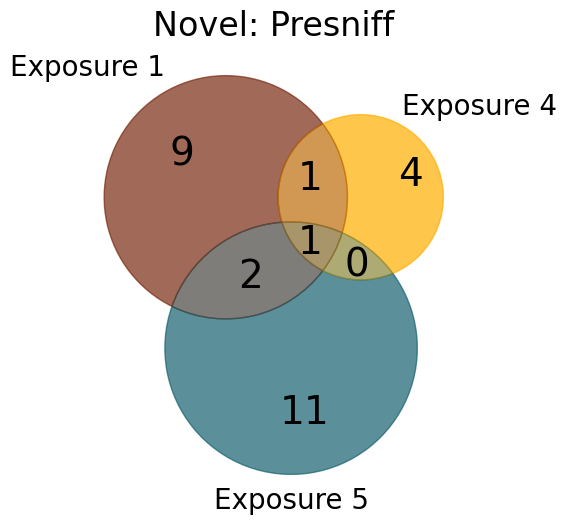

In [84]:
set1 = set(novel_master_df_trimmed.index[novel_master_df_trimmed['cell group'].str.contains('exp1')])
set2 = set(novel_master_df_trimmed.index[novel_master_df_trimmed['cell group'].str.contains('exp4')])
set3 = set(novel_master_df_trimmed.index[novel_master_df_trimmed['cell group'].str.contains('exp5')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Exposure 1', 'Exposure 4', 'Exposure 5'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Novel: Presniff', fontsize =24)
plt.savefig('phase2_venn_baseline.png', format='png', dpi=600, transparent = True)
plt.show()

In [86]:
cagemate_collection.wilcox_dfs
df_list = []
for comparison in ['3s exp1 vs 1s baseline', '3s exp2 vs 1s baseline', '3s exp3 vs 1s baseline','3s exp4 vs 1s baseline','3s exp5 vs 1s baseline' ]:
    df = cagemate_collection.wilcox_dfs[comparison]
    df_list.append(df)
comparisons = ['3s exp1 vs 1s baseline', '3s exp2 vs 1s baseline', '3s exp3 vs 1s baseline','3s exp4 vs 1s baseline','3s exp5 vs 1s baseline' ]
is_first = True 
i = 0
for df in df_list:
    
    if is_first:
        cagemate_master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
        i+=1
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        temp_df.columns = ['Subject', 'Recording', 'original unit id', 
                            f'Event {comparisons[i]}', f'event{comparisons[i]} sdl;kfgsd;l|']
        cagemate_master_df = cagemate_master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
        i +=1
cagemate_master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'exp1 vs baseline',
 'Event_y',
 'exp2 vs baseline',
 'Event_x',
 'exp3 vs baseline',
 'event_z',
 'exp4 vs baseline',
 'event_a',
 'exp5 vs baseline']
cagemate_master_df_trimmed = cagemate_master_df[['original unit id',
 'exp1 vs baseline',
 'exp2 vs baseline',
 'exp3 vs baseline',
 'exp4 vs baseline',
 'exp5 vs baseline']]
def group_cells(exp1, exp2, exp3, exp4, exp5):
    group = ''
    if (exp1 == 'increases') or (exp1 == 'decreases'):
        group = 'exp1'
    if (exp2 == 'increases') or (exp2 == 'decreases'):
        group = group + 'exp2' 
    if (exp3 == 'increases') or (exp3 == 'decreases'):
        group = group + 'exp3'
    if (exp4 == 'increases') or (exp4 == 'decreases'):
        group = group + 'exp4'
    if (exp5 == 'increases') or (exp5 == 'decreases'):
        group = group + 'exp5'
    return group

cagemate_master_df_trimmed['cell group'] = cagemate_master_df_trimmed.apply(lambda row: group_cells(row['exp1 vs baseline'],
                                                                  row['exp2 vs baseline'],
                                                                  row['exp3 vs baseline'],
                                                                  row['exp4 vs baseline'],
                                                                  row['exp5 vs baseline']), axis = 1)
results = cagemate_master_df_trimmed.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_28176\289668372.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cagemate_master_df_trimmed['cell group'] = cagemate_master_df_trimmed.apply(lambda row: group_cells(row['exp1 vs baseline'],


,original unit id,exp1 vs baseline,exp2 vs baseline,exp3 vs baseline,exp4 vs baseline,exp5 vs baseline
cell group,,,,,,
,94,94,83,81,81,83
exp1,9,9,9,6,6,8
exp1exp4exp5,1,1,1,1,1,1
exp2,4,4,4,4,4,4
exp2exp3,1,1,1,1,1,1
exp2exp4,1,1,1,1,1,1
exp3exp5,1,1,1,1,1,1
exp4,3,3,3,3,3,2
exp5,7,7,7,7,7,7


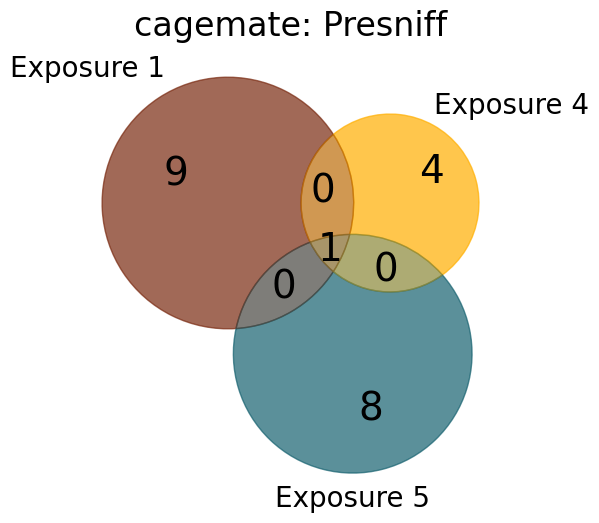

In [87]:
set1 = set(cagemate_master_df_trimmed.index[cagemate_master_df_trimmed['cell group'].str.contains('exp1')])
set2 = set(cagemate_master_df_trimmed.index[cagemate_master_df_trimmed['cell group'].str.contains('exp4')])
set3 = set(cagemate_master_df_trimmed.index[cagemate_master_df_trimmed['cell group'].str.contains('exp5')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Exposure 1', 'Exposure 4', 'Exposure 5'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('cagemate: Presniff', fontsize =24)
plt.savefig('phase2_venn_baseline.png', format='png', dpi=600, transparent = True)
plt.show()